<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

In [1]:
%matplotlib inline

import networkx as nx
# import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

In [2]:
INPUT_FILE = "dbpedia-similar\\out.dbpedia-similar"

G = nx.read_edgelist(INPUT_FILE, nodetype=int, comments="%")
G_multi = nx.read_edgelist(INPUT_FILE, nodetype=int, comments="%", create_using=nx.MultiGraph)

if len(G.edges) != len(G_multi.edges):
    print("There are multiple edges!")

In [3]:
print(list(nx.nodes_with_selfloops(G)))
G.remove_edges_from(nx.selfloop_edges(G))
print(list(nx.nodes_with_selfloops(G)))

[420]
[]


 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [4]:
initial_node_count = len(G)
initial_edge_count = len(G.edges)
initial_mean_degree = np.mean([deg for _, deg in G.degree])
initial_connected_components = nx.number_connected_components(G)

printmd(f"Number of nodes: {initial_node_count}")
printmd(f"Number of edges: {initial_edge_count}")
printmd(f"Mean degree: {initial_mean_degree}")
printmd(f"Number of connected components: {initial_connected_components}")

Number of nodes: 430

Number of edges: 564

Mean degree: 2.6232558139534885

Number of connected components: 95

<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [5]:
adj_matrix = nx.to_numpy_array(G)
unconnected = []
for i in range(len(G)):
    for j in range(i+1, len(G)):
        if adj_matrix[i, j] == 0:
            unconnected.append((i + 1, j + 1))
print(len(unconnected))

91671


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [6]:
# removable edges: check splitting and number of nodes
GG = G.copy()
edges = list(G.edges)
removable_edges = []
for e in edges:
    GG.remove_edge(*e)
    if (nx.number_connected_components(GG) == initial_connected_components) and (len(GG) == initial_node_count):
        removable_edges.append(e)
    else:
        GG.add_edge(*e)
print(len(removable_edges))

229


#### Παρατήρηση

Παρατηρείστε ότι αφαιρώντας τις removable edges μέχρι το σημείο που να μην υπάρχουν άλλες, θα καταλήξουμε ουσιαστικά στο να έχει μείνει από την κάθε συνεκτική συνιστώσα του αρχικού μας γραφήματος ένα συνδετικό δέντρο. Δηλαδή, το `GG` θα είναι ένα δάσος (πολλά ασύνδετα δέντρα). Κατά συνέπεια, θα πρέπει το πλήθος των ακμών του να ισούται με το πλήθος των κορυφών μείον το πλήθος των συνεκτικών συνιστωσών, $m = n - k$, όπως ξέρουμε ότι ισχύει πάντα σε ένα δάσος.

Αυτό ακριβώς ελέγχουμε παρακάτω ότι ισχύει, σαν ένα έξτρα sanity check, μαζί με ορισμένους ακόμα ελέγχους.

In [7]:
print(initial_connected_components)
print(nx.number_connected_components(GG))
print("Number of connected components has remained unchanged.")
print(len(G))
print(len(GG))
print("Number of nodes has remained unchanged")
print(nx.number_of_edges(GG))
print(nx.number_of_edges(G) - len(removable_edges))
print(nx.number_of_edges(GG) == len(GG) - nx.number_connected_components(GG))
print("Forest identity holds!")

95
95
Number of connected components has remained unchanged.
430
430
Number of nodes has remained unchanged
335
335
True
Forest identity holds!


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [8]:
# dataframe of removable edges (they will function as positive samples)
removable_df = pd.DataFrame(removable_edges, columns=["Node 1", "Node 2"])
removable_df['link'] = 1

# dataframe of unconnected node pairs (they will function as negative samples)
unconnected_df = pd.DataFrame(unconnected, columns=["Node 1", "Node 2"])
unconnected_df['link'] = 0 # uncomment and complete

# merge in one dataframe
data = pd.concat([removable_df, unconnected_df], axis=0, ignore_index=True)

#build graph G'=G_reduced
G_reduced = GG

In [9]:
reduced_node_count = len(G_reduced)
reduced_edge_count = len(G_reduced.edges)
reduced_mean_degree = np.mean([deg for _, deg in G_reduced.degree])
reduced_connected_components = nx.number_connected_components(G_reduced)

printmd(f"Number of **nodes**: {reduced_node_count}")
printmd(f"Number of **edges**: {reduced_edge_count}")
printmd(f"Mean **degree**: {reduced_mean_degree}")
printmd(f"Number of **connected components**: {reduced_connected_components}")

Number of **nodes**: 430

Number of **edges**: 335

Mean **degree**: 1.558139534883721

Number of **connected components**: 95

<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [10]:
jaccard = list(nx.jaccard_coefficient(G_reduced))

In [11]:
k = 8

jaccard.sort(key=lambda t: t[2], reverse=True)
print([(u, v) for u, v, _ in jaccard[:k]])

[(4, 46), (4, 47), (4, 49), (23, 34), (27, 33), (46, 47), (46, 49), (47, 49)]


In [12]:
uncon = unconnected

def JCfunction(threshold_jc):
    jaccs = list(nx.jaccard_coefficient(G_reduced))
    
    positives = {(u, v) for (u, v, j) in jaccs if j >= threshold_jc}
    negatives = {(u, v) for (u, v, j) in jaccs if j < threshold_jc}
    
    removables = set(removable_edges)
    unconnected = set(uncon)
    
    TP = positives & removables
    TN = negatives & unconnected
    FP = positives & unconnected
    FN = negatives & removables
    
    recall_jc = len(TP) / (len(TP) + len(FN))
    precision_jc = len(TP) / (len(TP) + len(FP))
    accuracy_jc = (len(TP) + len(TN)) / (len(TP) + len(TN) + len(FP) + len(FN))
    return recall_jc, precision_jc, accuracy_jc;

In [13]:
thres = [0.1, 0.15, 0.25, 0.5, 1.0]
jcs = [JCfunction(t) for t in thres]
recalls = [jc[0] for jc in jcs]
precisions = [jc[1] for jc in jcs]
accuracies = [jc[2] for jc in jcs]

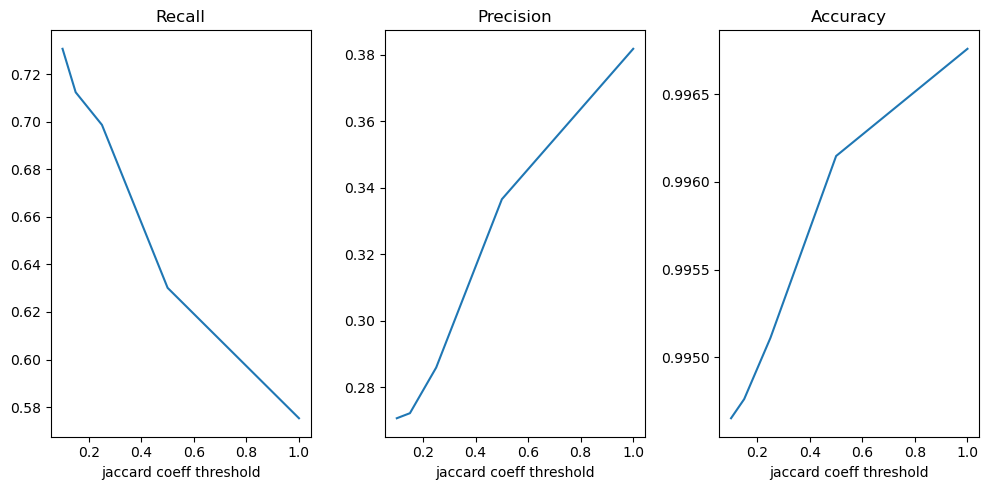

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 5))

ax1.plot(thres, recalls)
ax1.set_title("Recall")
ax1.set_xlabel("jaccard coeff threshold")

ax2.plot(thres, precisions)
ax2.set_title("Precision")
ax2.set_xlabel("jaccard coeff threshold")

ax3.plot(thres, accuracies)
ax3.set_title("Accuracy")
ax3.set_xlabel("jaccard coeff threshold")

fig.tight_layout()

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

Για το πρώτο ερώτημα, προτείνουμε το Pearson correlation coefficient, που είναι μία κλασσική τεχνική για αναζήτηση συσχετίσεων μεταξύ τυχαίων μεταβλητών, από δείγματά τους.

In [20]:
jaccs = list(nx.jaccard_coefficient(G_reduced))
jaccs = list(map(lambda item: item[2], jaccs))
print(len(jaccs))
prefs = list(nx.preferential_attachment(G_reduced))
prefs = list(map(lambda item: item[2], prefs))
allocs = list(nx.resource_allocation_index(G_reduced))
allocs = list(map(lambda item: item[2], allocs))

91900


In [21]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
data_copy = data.set_index(["Node 1", "Node 2"])
print(data)
print(data_copy)

       Node 1  Node 2  link
0           1       2     1
1           1       3     1
2           1       4     1
3           3       4     1
4           3       5     1
...       ...     ...   ...
91895     426     430     0
91896     427     428     0
91897     427     429     0
91898     427     430     0
91899     429     430     0

[91900 rows x 3 columns]
               link
Node 1 Node 2      
1      2          1
       3          1
       4          1
3      4          1
       5          1
...             ...
426    430        0
427    428        0
       429        0
       430        0
429    430        0

[91900 rows x 1 columns]


In [22]:
data_copy.sort_index(inplace=True)

In [23]:
%%time

#dataframe for similarity-based measurement values
#Jaccard Coefficient
for u, v, val in nx.jaccard_coefficient(G_reduced, removable_edges):
    data_copy.loc[(u, v), "jaccard"] = val
for u, v, val in nx.jaccard_coefficient(G_reduced, unconnected):
    data_copy.loc[(u, v), "jaccard"] = val

#Preferential Attachment
for u, v, val in nx.preferential_attachment(G_reduced, removable_edges):
    data_copy.loc[(u, v), "preferential"] = val
for u, v, val in nx.preferential_attachment(G_reduced, unconnected):
    data_copy.loc[(u, v), "preferential"] = val

#Resource Allocation
for u, v, val in nx.resource_allocation_index(G_reduced, removable_edges):
    data_copy.loc[(u, v), "allocation"] = val
for u, v, val in nx.resource_allocation_index(G_reduced, unconnected):
    data_copy.loc[(u, v), "allocation"] = val

CPU times: total: 22.2 s
Wall time: 1min 25s


In [24]:
print(data_copy)
print(data_copy.isna().any())

               link  jaccard  preferential  allocation
Node 1 Node 2                                         
1      2          1      0.0           1.0         0.0
       3          1      0.0           2.0         0.0
       4          1      0.0           1.0         0.0
       6          0      0.0           7.0         0.0
       7          0      0.0           1.0         0.0
...             ...      ...           ...         ...
426    430        0      0.0           1.0         0.0
427    428        0      0.0           2.0         0.0
       429        0      0.0           1.0         0.0
       430        0      0.0           1.0         0.0
429    430        0      1.0           1.0         0.5

[91900 rows x 4 columns]
link            False
jaccard         False
preferential    False
allocation      False
dtype: bool


<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [25]:
#uncomment whole cell
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [26]:
X = data_copy.drop("link", axis=1).to_numpy()
y = data_copy['link'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [27]:
classifier = RandomForestClassifier()

mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}
model = GridSearchCV(classifier, param_grid = parameters)

In [28]:
model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [29]:
predictions = model.predict(X_test_scaled)
predictions[:k] #get (A.M. last digit) first predictions

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
acc = accuracy_score(y_test, predictions)
printmd(f"Accuracy is equal to {acc}")
print(classification_report(y_test, predictions))

Accuracy is equal to 0.9979978237214363

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22922
           1       0.58      0.47      0.52        53

    accuracy                           1.00     22975
   macro avg       0.79      0.74      0.76     22975
weighted avg       1.00      1.00      1.00     22975



Πρόβλεψη της πιθανότητας να συνδεθούν οι κόμβοι 1 και 47.

In [31]:
sample = data_copy.loc[(1, 47)].drop("link", axis=1).to_numpy()
sample = mm_scaler.transform(sample)
model.predict_proba(sample)

array([[9.99728921e-01, 2.71078726e-04]])

<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [32]:
#install node2vec with conda / pip
from node2vec import Node2Vec
import multiprocessing

In [33]:
#generate walks
node2vec_walker = Node2Vec(
    G_reduced,
    dimensions=128,
    walk_length=80,
    num_walks=10,
    p=1,
    q=1,
    workers=multiprocessing.cpu_count()
)

#train node2vec model
n2v_model = node2vec_walker.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [34]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i, j in zip(data['Node 1'], data['Node 2'])]

In [35]:
x

[array([ 0.4222955 ,  0.477937  , -0.39823756,  0.8922391 , -0.14849374,
        -0.42799282, -0.7147837 ,  0.7918729 , -0.6601193 ,  0.12463242,
         0.01878814,  0.43214104, -0.20191932, -0.4405809 , -0.5412106 ,
        -0.08169882,  0.8177675 ,  0.41045153, -0.09602603, -0.49465787,
        -0.45703927,  0.15974456, -0.6907357 ,  0.1250445 , -0.69451123,
         0.718888  ,  0.2189056 ,  1.0286555 ,  0.12257403,  0.3056325 ,
        -0.05718628,  0.5599376 , -1.135253  ,  0.23254254,  0.4080778 ,
         0.68473434,  1.1716974 , -0.2100096 ,  0.1403142 ,  0.51873404,
         0.09847002,  0.34551275,  0.2982142 ,  0.4717325 , -0.3601409 ,
        -0.13651419,  0.17309678,  0.01637155, -0.44845507, -0.86881673,
        -0.3744653 ,  0.17175624,  0.46991476,  0.19329447,  0.7322748 ,
        -1.0471039 ,  0.7831032 ,  0.07434539, -1.0981816 ,  0.75415266,
         0.36771056,  1.0874825 ,  0.7543471 ,  0.2047557 ,  0.10645544,
        -0.81169105,  0.41415042,  0.03942946,  1.6

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, data["link"].to_numpy(), random_state = 0)

In [37]:
classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train, y_train)

preds = classifier.predict(X_test)
print(f"Random Forest classifier accuracy is equal to {accuracy_score(y_test, preds)}")

Random Forest classifier accuracy is equal to 0.997519042437432


<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

## Average

In [38]:
x = np.array([(n2v_model.wv[str(i)]+n2v_model.wv[str(j)])/2 for i, j in zip(data['Node 1'], data['Node 2'])])
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, data["link"].to_numpy(), random_state = 0)

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train1, y_train1)

preds = classifier.predict(X_test1)
print(f"Random Forest classifier accuracy is equal to {accuracy_score(y_test1, preds)}")
print(classification_report(y_test1, preds))

Random Forest classifier accuracy is equal to 0.997519042437432
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22918
           1       0.00      0.00      0.00        57

    accuracy                           1.00     22975
   macro avg       0.50      0.50      0.50     22975
weighted avg       1.00      1.00      1.00     22975



C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
preds.nonzero()

(array([], dtype=int64),)

## Hadamard

In [40]:
x = np.array([(n2v_model.wv[str(i)]*n2v_model.wv[str(j)]) for i, j in zip(data['Node 1'], data['Node 2'])])
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, data["link"].to_numpy(), random_state = 0)

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train2, y_train2)

preds = classifier.predict(X_test2)
print(f"Random Forest classifier accuracy is equal to {accuracy_score(y_test2, preds)}")
print(classification_report(y_test2, preds))

Random Forest classifier accuracy is equal to 0.997519042437432
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22918
           1       0.00      0.00      0.00        57

    accuracy                           1.00     22975
   macro avg       0.50      0.50      0.50     22975
weighted avg       1.00      1.00      1.00     22975



C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
preds.nonzero()

(array([], dtype=int64),)

## Weighted-L1

In [42]:
x = np.array([np.abs(n2v_model.wv[str(i)] - n2v_model.wv[str(j)]) for i, j in zip(data['Node 1'], data['Node 2'])])
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, data["link"].to_numpy(), random_state = 0)

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train3, y_train3)

preds = classifier.predict(X_test3)
print(f"Random Forest classifier accuracy is equal to {accuracy_score(y_test3, preds)}")
print(classification_report(y_test3, preds))

Random Forest classifier accuracy is equal to 0.997519042437432
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22918
           1       0.00      0.00      0.00        57

    accuracy                           1.00     22975
   macro avg       0.50      0.50      0.50     22975
weighted avg       1.00      1.00      1.00     22975



C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
preds.nonzero()

(array([], dtype=int64),)

## Weighted-L2

In [44]:
x = np.array([np.abs(n2v_model.wv[str(i)] - n2v_model.wv[str(j)])**2 for i, j in zip(data['Node 1'], data['Node 2'])])
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, data["link"].to_numpy(), random_state = 0)

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train4, y_train4)

preds = classifier.predict(X_test4)
print(f"Random Forest classifier accuracy is equal to {accuracy_score(y_test4, preds)}")
print(classification_report(y_test4, preds))

Random Forest classifier accuracy is equal to 0.997519042437432
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22918
           1       0.00      0.00      0.00        57

    accuracy                           1.00     22975
   macro avg       0.50      0.50      0.50     22975
weighted avg       1.00      1.00      1.00     22975



C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dinos\anaconda3\envs\sna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
preds.nonzero()

(array([], dtype=int64),)

# Τελικές Παρατηρήσεις

- Εξ αρχής, το σύνολο δεδομένων μας αποτελείται από ελάχιστα θετικά δείγματα (τις removable ακμές) και πάρα πολλά αρνητικά (τις unconnected). Δεν είναι, λοιπόν, παράξενο ότι, χωρίς κάποια επιπλέον προεπεξεργασία, βλέπουμε τις παραπάνω παθογένειες, όπου ειδικά για τα χαρακτηριστικά που έχουν εξαχθεί από τον node2vec, το Random Forest καταλήγει τελικά, ανεξαρτήτως του binary operator, να μαθαίνει ότι δίνω πάντα την κλάση 0!
- Αν θέλαμε να κάνουμε μία πιο σοβαρή machine learning προσέγγιση, μάλλον θα έπρεπε να προσπαθήσουμε να αντιμετωπίσουμε το εξαιρετικά μη ισορροπημένο dataset με κάποια μέθοδο, π.χ. oversampling των θετικών δειγμάτων.

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>